# Análisis de componentes principales (PCA)

Dada una matriz de datos $X_{centrado} \in \mathbb{R}^{n \times m}$ con $n$ datos y $m$ atributos, y con media cero para cada atributo (datos "centrados"). Queremos encontrar un cambio de base que nos genere una nueva matriz $\hat{X}$ donde los atributos sean ortogonales y ordenados de mayor a menor importancia.

Para eso calculamos los autovectores de la matriz de covarianza: $$C_X = \frac{X_{centrado}^tX_{centrado}}{n-1}$$ y su descomposición espectral $C_x = VDV^t$ (por que $C_X$ es simétrica y semi-definida positiva). La matriz $V \in \mathbb{R}^{m \times m}$ (ortogonal) contiene en las columnas los autovectores de $C_X$ y si los ordenamos de mayor autovalor a menor, obtenemos las componentes principales.

En la práctica se puede utilizar SVD sobre $X_{centrado}$. Si $X_{centrado} = U\Sigma V^t$ entonces, $V \in \mathbb{R}^{m \times m}$ es la matriz de componentes principales.

### **Demo interactiva**
https://setosa.io/ev/principal-component-analysis/

### **Videos**
https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv

# Ejemplo con nube de puntos 2D

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Varianza coordenadas originales: [0.85399952 3.30584681]


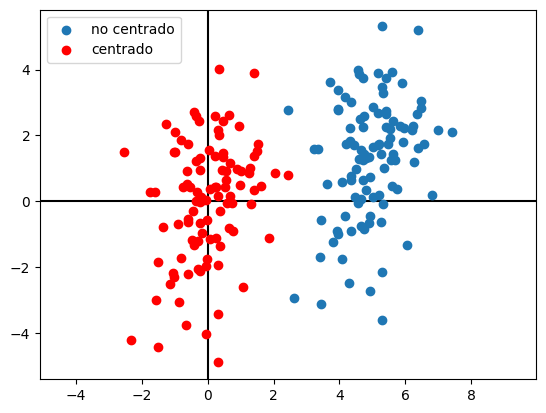

In [ ]:
np.random.seed(1234)
X = np.random.multivariate_normal([5,1], [[1,1],[1,4]], 100)

plt.axhline(0, color='black',zorder=-1)
plt.axvline(0, color='black',zorder=-1);

plt.scatter(X[:,0],X[:,1], label='no centrado')

print("Varianza coordenadas originales:", np.var(X,0))

Xcentered = X - X.mean(0)
plt.scatter(Xcentered[:,0],Xcentered[:,1],color='r', label='centrado')
plt.axis('equal');
plt.legend();

Varianza componentes principales: [3.39940838 0.76043796]
Autovectores:
[[-0.18829183 -0.98211312]
 [-0.98211312  0.18829183]]


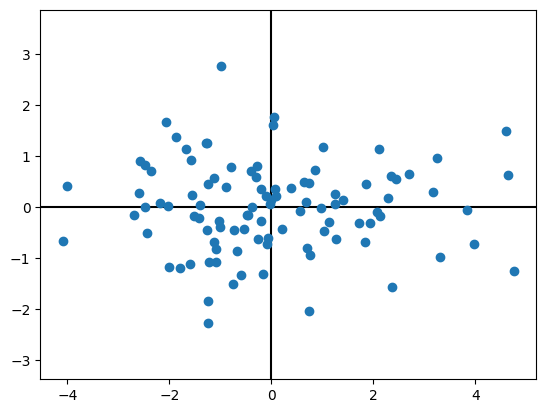

In [ ]:
u, s, vh = np.linalg.svd(Xcentered)
print("Varianza componentes principales:", s**2/len(X))
print("Autovectores:")
print(vh.T)

Xhat = Xcentered@vh.T
plt.scatter(Xhat[:,0],Xhat[:,1])
plt.axhline(0, color='black',zorder=-1)
plt.axvline(0, color='black',zorder=-1);
plt.axis('equal');

Cada fila de vh es un autovector de la matriz de covarianza y por lo tanto la dirección de una componente principal

Con Scikit Learn, podemos ajustar y rotar los datos y obtener las componentes, una por cada fila de pca.components_

Varianza: [3.43374583 0.76811915]
Autovectores:
[[-0.18829183 -0.98211312]
 [-0.98211312  0.18829183]]


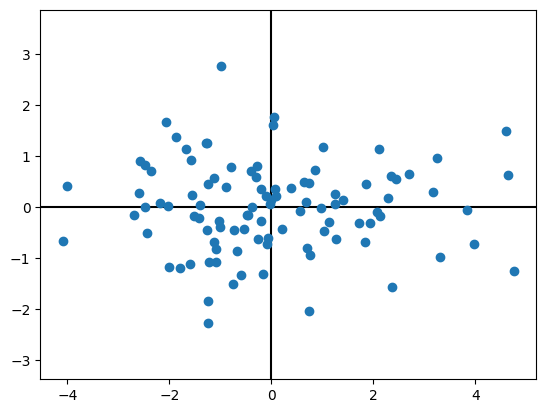

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xhat = pca.fit_transform(X)
print("Varianza:", pca.explained_variance_)
print("Autovectores:")
print(pca.components_.T)

plt.scatter(Xhat[:,0],Xhat[:,1])
plt.axhline(0, color='black',zorder=-1)
plt.axvline(0, color='black',zorder=-1);
plt.axis('equal');

### Hacer PCA con descomposición espectral

**Ejercicio 1:** Construir la matriz de covarianza y usar $\text{np.linalg.eigh}$

Obtener las mismas componentes principales

In [ ]:

print(C.shape)


print(V)

plt.scatter(Xhat[:,0],Xhat[:,1])
plt.axhline(0, color='black',zorder=-1)
plt.axvline(0, color='black',zorder=-1);
plt.axis('equal');

**Ejercicio 2:** Graficar las componentes principales como lineas sobre el gráfico en el espacio original de X, con el largo de cada linea dada por la varianza y obtener este gráfico

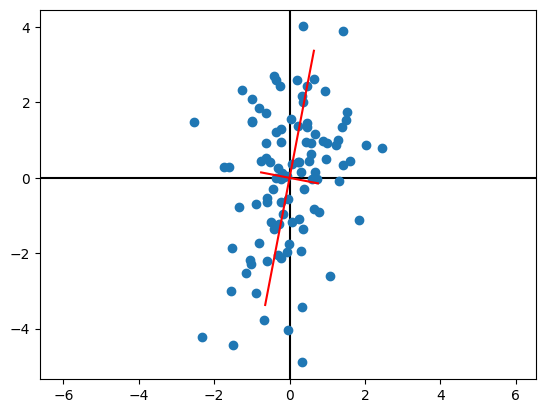

In [ ]:
Xcentered = X - X.mean(0)
plt.scatter(Xcentered[:,0],Xcentered[:,1])

plt.plot([x12,x12],[y11,y12],'r')
plt.plot([x21,x22],[y21,y22],'r')

plt.axhline(0, color='black',zorder=-1)
plt.axvline(0, color='black',zorder=-1);
plt.axis('equal');

# PCA en imágenes

In [ ]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
!wget https://www.dropbox.com/s/m61soq8700l6fpv/caras.csv

In [ ]:
X = pd.read_csv('caras.csv').values/255
X.shape

(400, 2576)

### ¡Más atributos que datos!

In [ ]:
h,w = 112//2, 92//2

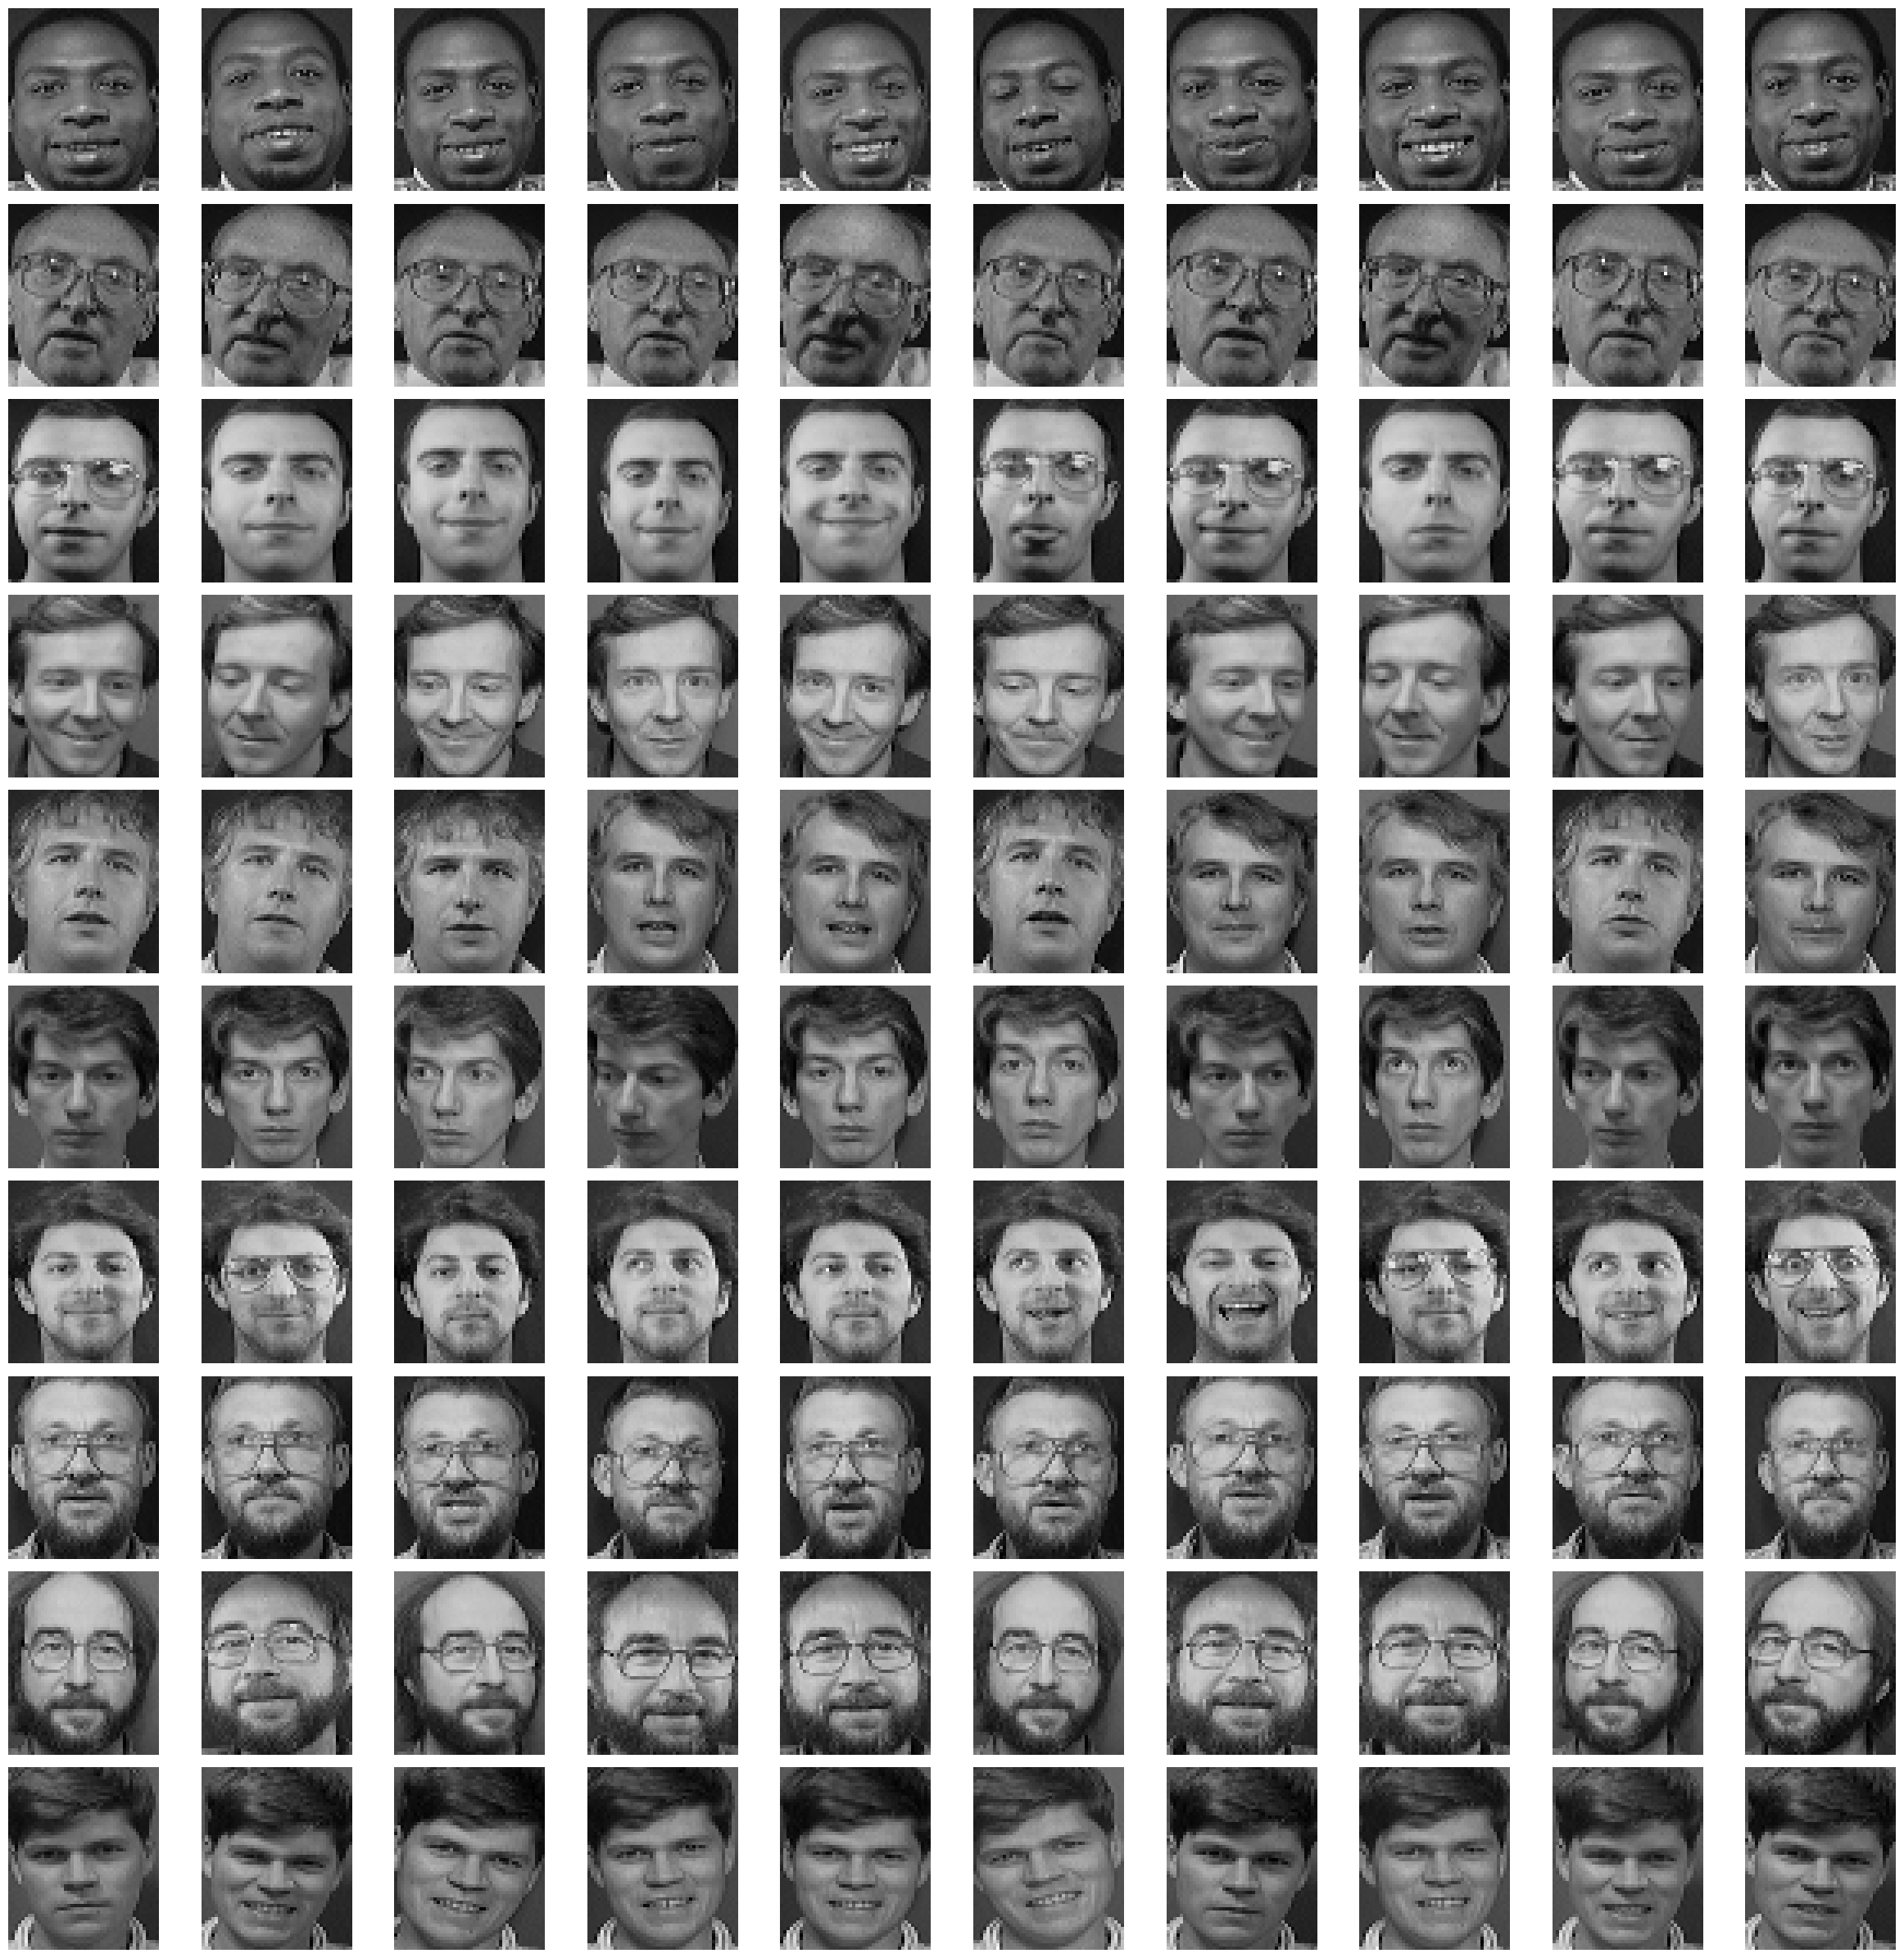

In [ ]:
f, axs = plt.subplots(10,10, figsize=(24,24))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(X[i].reshape(h,w), cmap=plt.cm.gray, vmax=1);
  ax.axis('off')
plt.tight_layout()

Cantidad de componentes:

In [ ]:
pca = PCA()
Xhat = pca.fit_transform(X)
pca.components_.shape

(400, 2576)

Dimensionalidad de los datos transformados

In [ ]:
Xhat.shape

(400, 400)

Cantidad de componentes que explican varianza:

In [ ]:
pca.explained_variance_.shape

(400,)

Las dimensiones de las componentes, no son una matriz cuadrada!

¿Qué pinta tienen las componentes? Primero las principales, luego las últimas

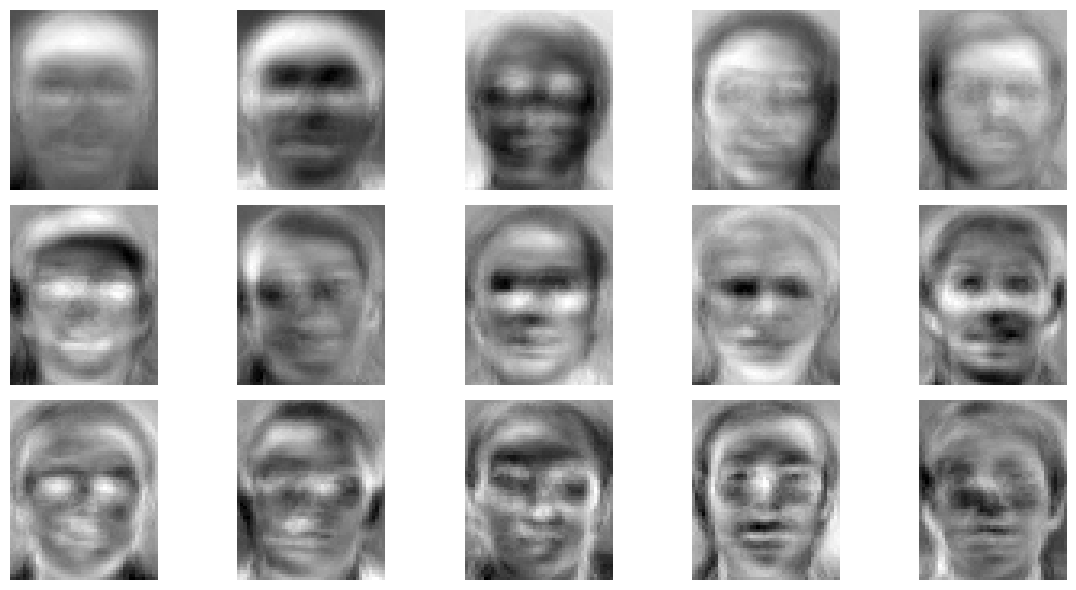

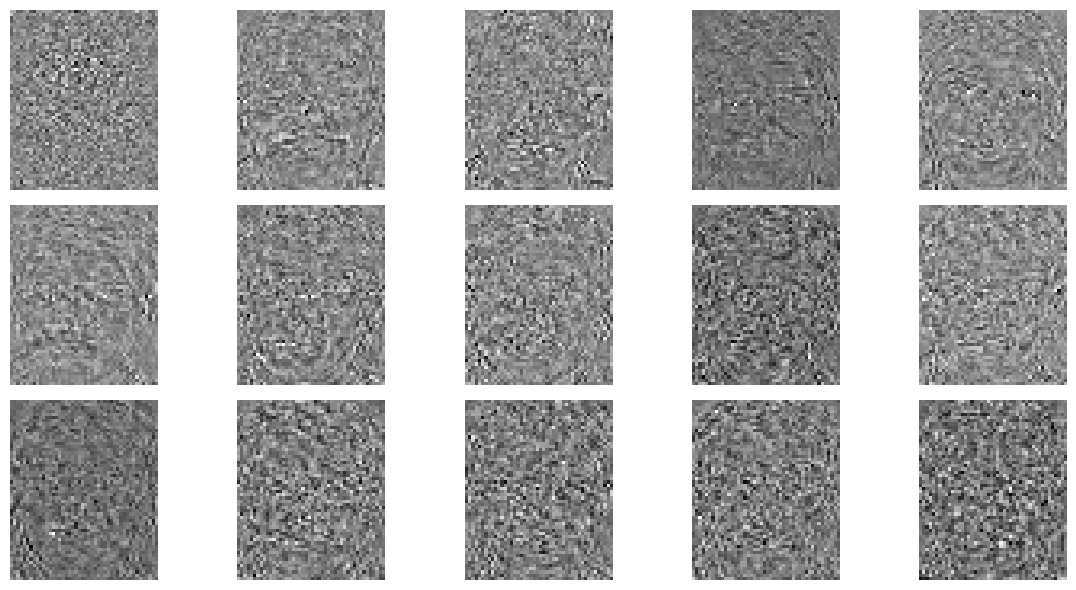

In [ ]:
f, axs = plt.subplots(3,5, figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(pca.components_[i,:].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

f, axs = plt.subplots(3,5, figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(pca.components_[-i-1,:].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

La varianza explicada por cada componente

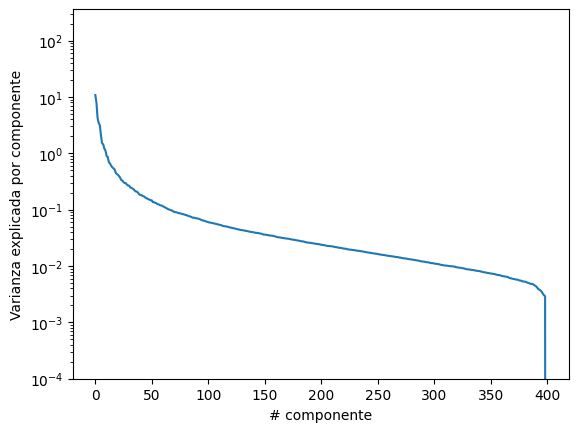

In [ ]:
plt.semilogy(pca.explained_variance_)
plt.ylim(1e-4,None);
plt.ylabel("Varianza explicada por componente")
plt.xlabel('# componente');

Más componentes más se explica la varianza total, con 100 ya se llega al 90% aprox

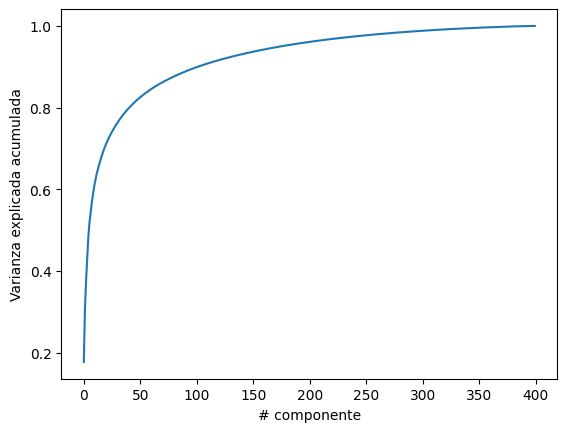

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.ylabel("Varianza explicada acumulada")
plt.xlabel('# componente');

Podemos expresar cualquier prenda como una combinación lineal de las autovectores, si tenemos menos componentes, tendremos una versión aproximada.

In [ ]:
k = 400 # cantidad de componentes máxima
pca = PCA(k).fit(X)
Xhat = pca.transform(X)
Xhat.shape

(400, 400)

Recordemos

$\hat{X} = X_{centrado}V$

Si usamos solo las primeras $k$ columnas de $V$, $V_k =(V_{i j})_{\substack{i \in r\\ 1 \le j \le k}}$

$\hat{X} = X_{centrado}V_{k}$

Para reconstruir la imagen $i$ debemos hacer la combinación lineal de las columnas $v_j \in \mathbb{R}^{n \times 1}$ con las proyección $\hat{X}_i \in \mathbb{R}^{1 \times k}$

$Y_i = \sum_{j=1}^k v_j \hat{X}_i + \mu_x$

**Ejercicio 3:**

Construir $Y$ usando

 $V_k = \text{pca.componentes_.T[:,:k]}$

 $\mu_X = \text{pca.mean_}$

Generar la imagen de las caras usando $k=100$ componentes

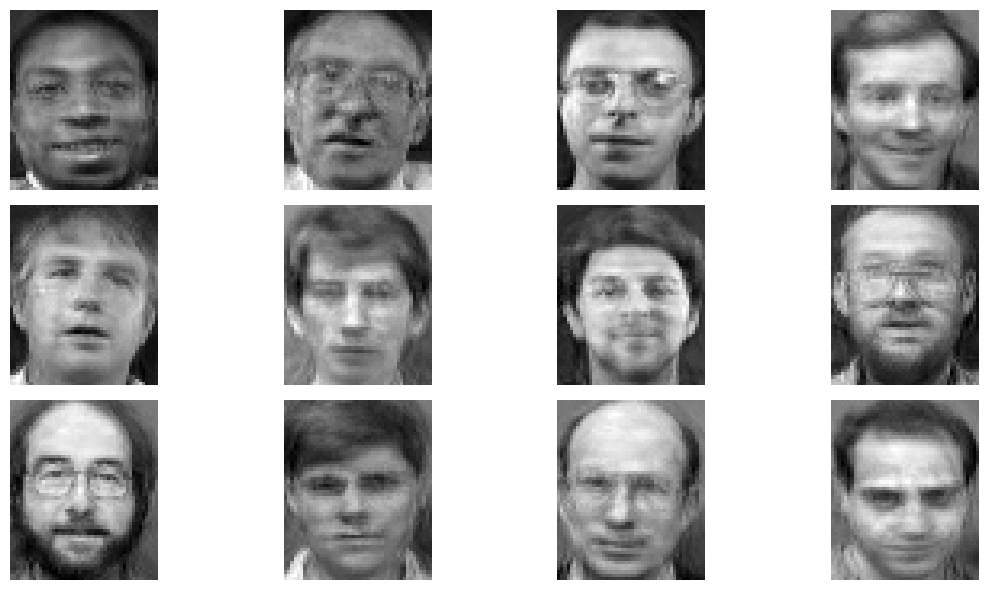

In [ ]:
f, axs = plt.subplots(3,4, figsize=(12,6))

K = 100
V = pca.components_.T[:,:k]
Z = (X-pca.mean_)@V

for i, ax in enumerate(axs.flatten()):
  Y = ...
  ax.imshow(np.array(Y).reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

# Similaridad entre imágenes

Podemos calcular la matriz de similaridad haciendo el producto interno de cada imagen contra cada otra. Un valor más alto indica imágenes más parecidas en términos de producto interno.

In [ ]:
Xcentered = X - X.mean(0)
S = Xcentered@Xcentered.T / (X.shape[1]-1) # normalización tipo covarianza
S = np.corrcoef(Xcentered) # idem a a normalizar por las normas de cada par de imágenes y obtener la correlación
S.shape

(400, 400)

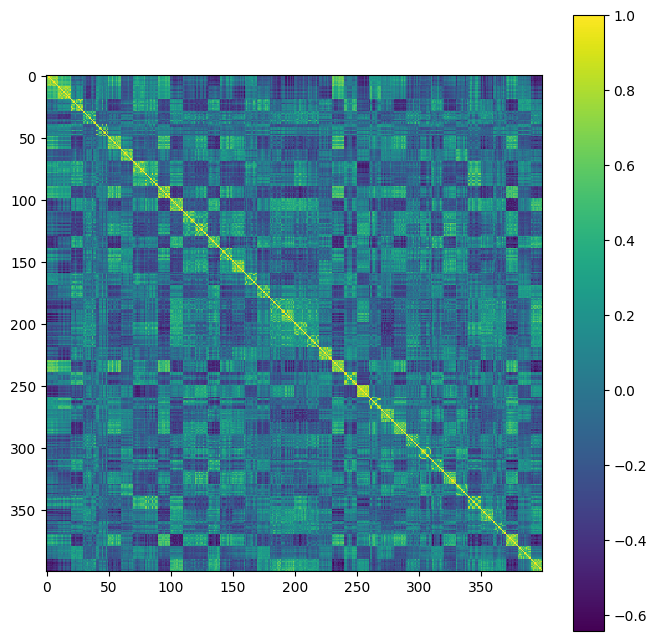

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(S, interpolation='none')
plt.colorbar();

Podemos calcular la misma matriz pero en el espacio ya filtrado

In [ ]:
k = 50 # cantidad de componentes máxima
pca = PCA(k).fit(X)
Xhat = pca.transform(X)
Xhat.shape

(400, 50)

In [ ]:
S = np.corrcoef(Xhat)
S.shape

(400, 400)

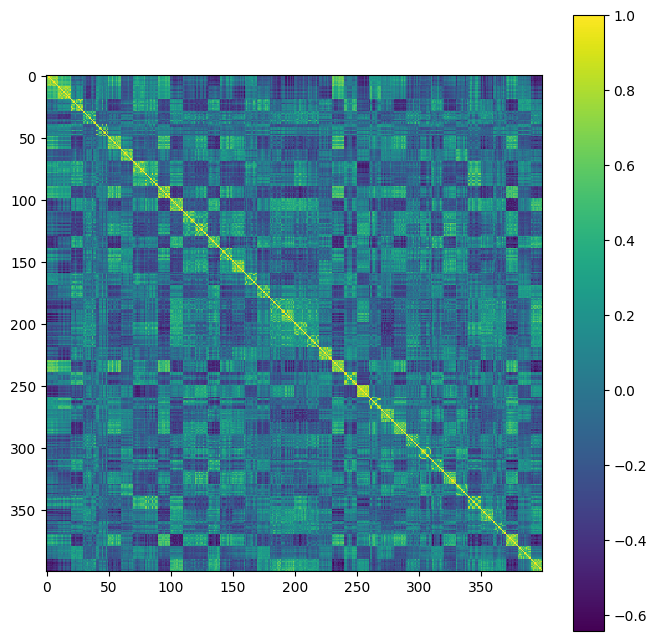

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(S, interpolation='none')
plt.colorbar();

Exploremos los valores de esta matriz para todos los valores de k

**Ejercicio 4:** Observemos los valores promedio de similaridad para las imágenes que son de la misma persona, comparado contra los valores de similaridad de personas distintas. Esto implica comparar el valor medio de los bloques diagonales de la matriz, con el valore medio del resto. Generar la siguiente imagen.

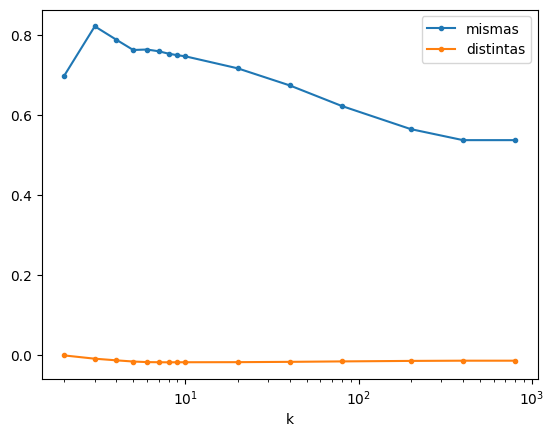

In [ ]:
import scipy
import pandas as pd
mask1 = (scipy.linalg.block_diag(*[np.ones((10,10))]*40)-np.eye(400))==1
mask2 = (np.ones((400,400)) - scipy.linalg.block_diag(*[np.ones((10,10))]*40))==1
def score_iguales_vs_distintos(S):
    return S[mask1].mean(), S[mask2].mean()

In [ ]:
Xcentered = X - X.mean(0)
data = []

Xhat = PCA().fit_transform(X)

ks = [2,3,4,5,6,7,8,9,10,20,40,80,200,400,800]
for k in ks:
    S = np.corrcoef( ... )
    a,b = score_iguales_vs_distintos(S)
    data.append({'mismas':a, 'distintas':b, 'k':k})

In [ ]:
pd.DataFrame(data).plot(x='k', marker='.')
plt.xscale('log');